# <b>India House Price Prediction</b>

# <h2>1. Understanding Problem/Requirement</h2>
Make a model to predict prices of houses of India

In [1]:
import pandas as pd
import numpy as np

## 2. Collecting Data From CSV File

In [86]:
house = pd.read_csv("house_price.csv")
house

,id,Date,No of bedrooms,No of bathrooms,living area,lot area,No of floors,waterfront present,No of views,house condition,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,No of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14615,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14616,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14617,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [87]:
house['house grade'].value_counts(ascending = False)

house grade
7     6011
8     4137
9     1828
6     1324
10     803
11     280
5      154
12      55
4       17
13      10
Name: count, dtype: int64

# <i>Keeping Relevant Data Only</i>

In [88]:
house.drop(['id','Date','No of views','Lattitude','Longitude','Distance from the airport'],axis=1,inplace=True)
house

,No of bedrooms,No of bathrooms,living area,lot area,No of floors,waterfront present,house condition,house grade,house area(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,living_area_renov,lot_area_renov,No of schools nearby,Price
0,4,2.50,2920,4000,1.5,0,5,8,1910,1010,1909,0,122004,2470,4000,2,1400000
1,5,2.75,2910,9480,1.5,0,3,8,2910,0,1939,0,122004,2940,6600,1,1200000
2,4,2.50,3310,42998,2.0,0,3,9,3310,0,2001,0,122005,3350,42847,3,838000
3,3,2.00,2710,4500,1.5,0,4,8,1880,830,1929,0,122006,2060,4500,1,805000
4,3,2.50,2600,4750,1.0,0,4,9,1700,900,1951,0,122007,2380,4750,1,790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,2,1.50,1556,20000,1.0,0,4,7,1556,0,1957,0,122066,2250,17286,3,221700
14615,3,2.00,1680,7000,1.5,0,4,7,1680,0,1968,0,122072,1540,7480,3,219200
14616,2,1.00,1070,6120,1.0,0,3,6,1070,0,1962,0,122056,1130,6120,2,209000
14617,4,1.00,1030,6621,1.0,0,4,6,1030,0,1955,0,122042,1420,6631,3,205000


In [43]:
house.head(3)

,No of bedrooms,No of bathrooms,living area,lot area,No of floors,waterfront present,house condition,house grade,house area(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,living_area_renov,lot_area_renov,No of schools nearby,Price
0,4,2.50,2920,4000,1.5,0,5,8,1910,1010,1909,0,122004,2470,4000,2,1400000
1,5,2.75,2910,9480,1.5,0,3,8,2910,0,1939,0,122004,2940,6600,1,1200000
2,4,2.50,3310,42998,2.0,0,3,9,3310,0,2001,0,122005,3350,42847,3,838000


In [91]:
house['house area(excluding basement)'].min()
#house['house area(excluding basement)'].value_counts()

370

# 3. Understanding Data

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   No of bedrooms                  14619 non-null  int64  
 1   No of bathrooms                 14619 non-null  float64
 2   living area                     14619 non-null  int64  
 3   lot area                        14619 non-null  int64  
 4   No of floors                    14619 non-null  float64
 5   waterfront present              14619 non-null  int64  
 6   house condition                 14619 non-null  int64  
 7   house grade                     14619 non-null  int64  
 8   house area(excluding basement)  14619 non-null  int64  
 9   Area of the basement            14619 non-null  int64  
 10  Built Year                      14619 non-null  int64  
 11  Renovation Year                 14619 non-null  int64  
 12  Postal Code                     

In [7]:
house.describe()

,No of bedrooms,No of bathrooms,living area,lot area,No of floors,waterfront present,house condition,house grade,house area(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,living_area_renov,lot_area_renov,No of schools nearby,Price
count,14619.000000,14619.000000,14619.000000,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04
mean,3.379233,2.129557,2098.156851,1.509369e+04,1.502326,0.007661,3.430399,7.682263,1801.676654,296.480197,1970.929817,90.930228,122033.064300,1996.641836,12754.003078,2.012244,5.388063e+05
std,0.938655,0.769955,928.218740,3.792089e+04,0.540241,0.087196,0.664047,1.174917,833.737588,448.566731,29.491743,416.230218,19.081451,691.078387,26059.234785,0.817312,3.672294e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,4.000000,370.000000,0.000000,1900.000000,0.000000,122003.000000,460.000000,651.000000,1.000000,7.800000e+04
25%,3.000000,1.750000,1440.000000,5.010500e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,122017.000000,1490.000000,5097.500000,1.000000,3.200000e+05
50%,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1580.000000,0.000000,1975.000000,0.000000,122032.000000,1850.000000,7620.000000,2.000000,4.500000e+05
75%,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,4.000000,8.000000,2240.000000,580.000000,1997.000000,0.000000,122048.000000,2380.000000,10125.000000,3.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,122072.000000,6110.000000,560617.000000,3.000000,7.700000e+06


# <h5> i. Understanding values</h5>

In [8]:
house.head(3)

,No of bedrooms,No of bathrooms,living area,lot area,No of floors,waterfront present,house condition,house grade,house area(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,living_area_renov,lot_area_renov,No of schools nearby,Price
0,4,2.50,2920,4000,1.5,0,5,8,1910,1010,1909,0,122004,2470,4000,2,1400000
1,5,2.75,2910,9480,1.5,0,3,8,2910,0,1939,0,122004,2940,6600,1,1200000
2,4,2.50,3310,42998,2.0,0,3,9,3310,0,2001,0,122005,3350,42847,3,838000


In [9]:
house['waterfront present'].value_counts()

waterfront present
0    14507
1      112
Name: count, dtype: int64

In [10]:
%matplotlib inline

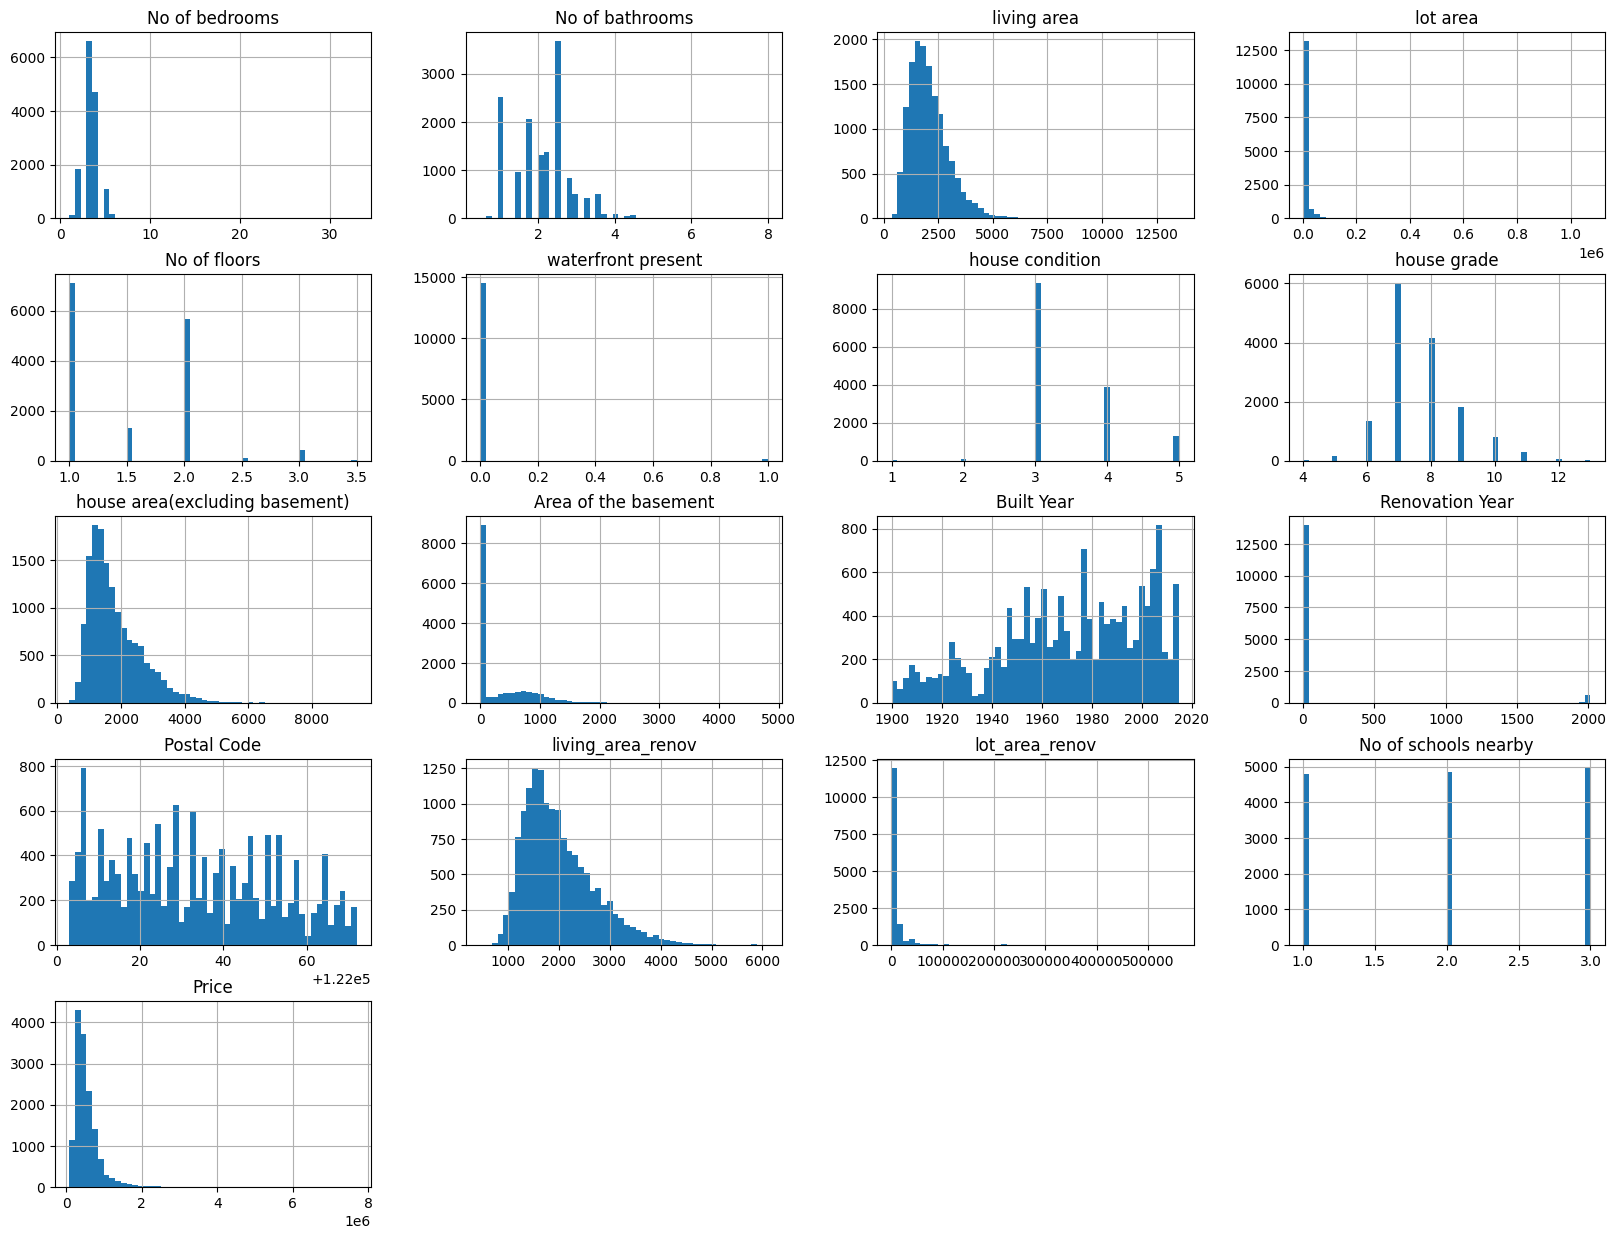

In [11]:
house.hist(bins=50,figsize=(20,15));

# <h5> ii. Checking for Correlations</h5>

In [12]:
corr_matrix = house.corr()
corr_matrix

,No of bedrooms,No of bathrooms,living area,lot area,No of floors,waterfront present,house condition,house grade,house area(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,living_area_renov,lot_area_renov,No of schools nearby,Price
No of bedrooms,1.000000,0.509783,0.570441,0.034438,0.177208,-0.006247,0.026326,0.352795,0.473482,0.300367,0.153184,0.016159,-0.043978,0.389765,0.029436,0.003399,0.308165
No of bathrooms,0.509783,1.000000,0.753540,0.080812,0.502912,0.060107,-0.128335,0.663082,0.684418,0.287194,0.498235,0.049676,-0.105504,0.570524,0.078637,0.002181,0.532031
living area,0.570441,0.753540,1.000000,0.174455,0.354682,0.105858,-0.063646,0.761783,0.875767,0.441537,0.309856,0.059431,-0.080138,0.757540,0.180362,0.002372,0.712276
lot area,0.034438,0.080812,0.174455,1.000000,-0.004128,0.026281,-0.008524,0.110582,0.183596,0.019755,0.051602,0.006846,0.070120,0.149766,0.706811,-0.012671,0.082117
No of floors,0.177208,0.502912,0.354682,-0.004128,1.000000,0.016322,-0.270136,0.463033,0.525604,-0.242980,0.481733,0.006719,-0.129704,0.285037,-0.010103,-0.007579,0.262649
waterfront present,-0.006247,0.060107,0.105858,0.026281,0.016322,1.000000,0.018662,0.079853,0.071885,0.085441,-0.024238,0.085863,0.038311,0.085755,0.032053,0.001563,0.263943
house condition,0.026326,-0.128335,-0.063646,-0.008524,-0.270136,0.018662,1.000000,-0.152898,-0.168052,0.180650,-0.381554,-0.062103,0.045601,-0.099974,-0.004704,-0.006938,0.040609
house grade,0.352795,0.663082,0.761783,0.110582,0.463033,0.079853,-0.152898,1.000000,0.758161,0.167187,0.440689,0.014532,-0.146161,0.719983,0.116779,0.000988,0.671805
house area(excluding basement),0.473482,0.684418,0.875767,0.183596,0.525604,0.071885,-0.168052,0.758161,1.000000,-0.046446,0.419679,0.025758,-0.083545,0.737710,0.194730,-0.002892,0.615179
Area of the basement,0.300367,0.287194,0.441537,0.019755,-0.242980,0.085441,0.180650,0.167187,-0.046446,1.000000,-0.138861,0.075104,-0.010547,0.196417,0.011283,0.010284,0.330499


In [13]:
corr_matrix['No of bedrooms'].sort_values(ascending=False)

No of bedrooms                    1.000000
living area                       0.570441
No of bathrooms                   0.509783
house area(excluding basement)    0.473482
living_area_renov                 0.389765
house grade                       0.352795
Price                             0.308165
Area of the basement              0.300367
No of floors                      0.177208
Built Year                        0.153184
lot area                          0.034438
lot_area_renov                    0.029436
house condition                   0.026326
Renovation Year                   0.016159
No of schools nearby              0.003399
waterfront present               -0.006247
Postal Code                      -0.043978
Name: No of bedrooms, dtype: float64

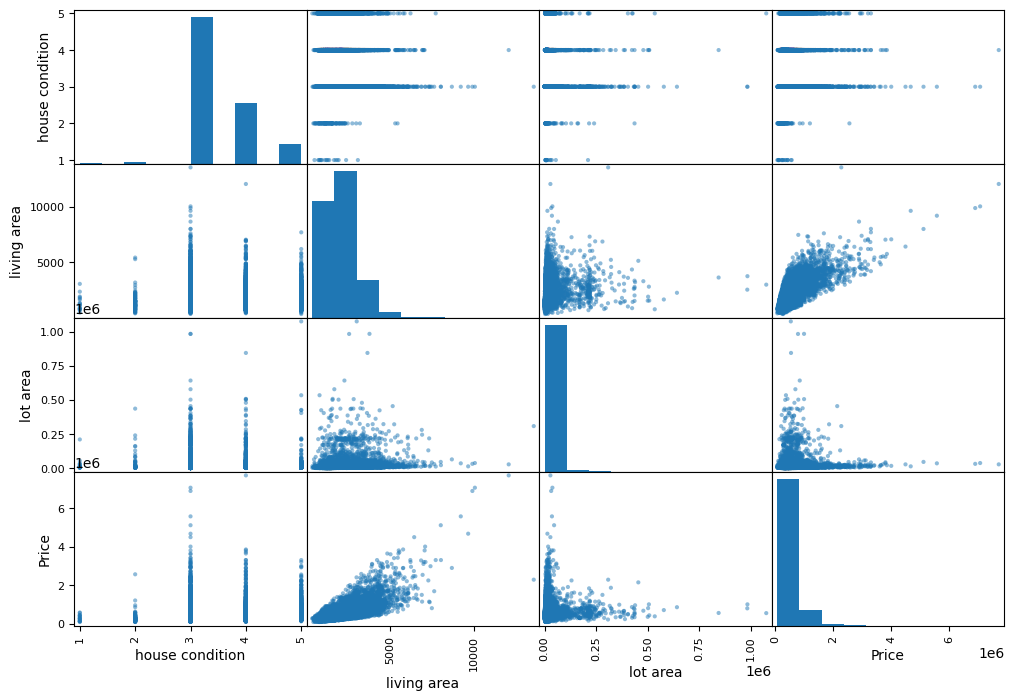

In [14]:
from pandas.plotting import scatter_matrix
attributes = ["house condition", "living area", "lot area","Price"]
scatter_matrix(house[attributes], figsize = (12,8));

In [15]:
#scatter_matrix(house, figsize = (12,8));

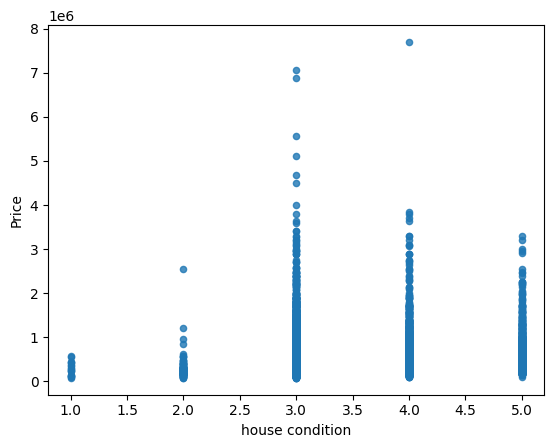

In [16]:
house.plot(kind="scatter", x="house condition", y="Price", alpha=0.8);

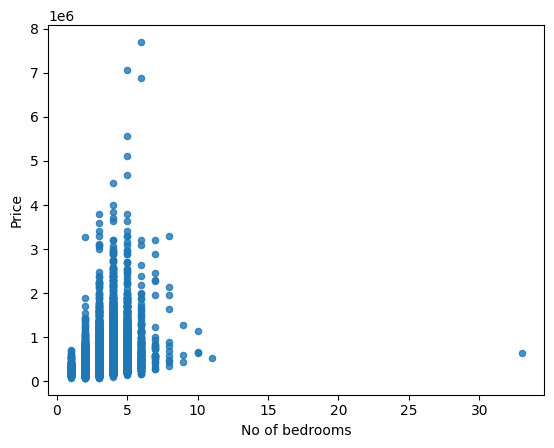

In [17]:
house.plot(kind="scatter", x="No of bedrooms", y="Price", alpha=0.8);

# <h2>4. Preparing Data</h2>

# <h5>i. Checking Missing Values</h5>

In [18]:
house.isnull().sum()

No of bedrooms                    0
No of bathrooms                   0
living area                       0
lot area                          0
No of floors                      0
waterfront present                0
house condition                   0
house grade                       0
house area(excluding basement)    0
Area of the basement              0
Built Year                        0
Renovation Year                   0
Postal Code                       0
living_area_renov                 0
lot_area_renov                    0
No of schools nearby              0
Price                             0
dtype: int64

# <h2> 5.Selecting a  model</h2>
    <li> By evaluating its score(using cross validation)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score 
from sklearn.svm import SVR

# <h3>Checking with LinearRegrssion model</h3>

In [20]:
linearregressionmodel = LinearRegression()
cross_val_score(linearregressionmodel,house.loc[:,'No of bedrooms':'No of schools nearby'],house.Price).mean()

0.6563414726640642

# <h3>Checking with DecisionTreeRegressor model</h3>

In [21]:
decisiontreeregressor = DecisionTreeRegressor()
cross_val_score(decisiontreeregressor,house.loc[:,'No of bedrooms':'No of schools nearby'],house.Price,cv=15).mean()

0.6253974416481507

# <h3>Checking with RandomForestRegressor model</h3>

In [22]:
randomforestregressor = RandomForestRegressor()
cross_val_score(randomforestregressor,house.loc[:,'No of bedrooms':'No of schools nearby'],house.Price).mean()

0.8111765316123474

# <h3>Checking with SVR model</h3>

In [23]:
svrmodel = SVR()
cross_val_score(svrmodel,house.loc[:,'No of bedrooms':'No of schools nearby'],house.Price, cv = 10).mean()

-0.060295927101613536

# <h2> 6. Train and Test Split</h2> 

In [24]:
from sklearn.model_selection import train_test_split
train_x,test_x,   train_y,test_y  = train_test_split(house.loc[:,'No of bedrooms':'No of schools nearby'],house.Price, test_size=0.2) 

In [25]:
train_x.shape

(11695, 16)

In [26]:
train_y.shape

(11695,)

In [27]:
features = house.loc[:,'No of bedrooms':'No of schools nearby']
target = house.Price

In [28]:
features.shape

(14619, 16)

In [29]:
target.shape

(14619,)

# <h2> 7. Improving selected model</h2>
<li>Parameter tuning


In [30]:
mymodel = RandomForestRegressor()
mymodel.fit(features,target)
mymodel.score(test_x,test_y)

0.9741610621148189

In [31]:
mymodel1 = RandomForestRegressor()
mymodel1.fit(train_x,train_y)
mymodel1.score(test_x,test_y)

0.8355615450591705

In [32]:
mymodel2 = RandomForestRegressor(n_estimators=10)
mymodel2.fit(train_x,train_y)
mymodel2.score(test_x,test_y)

0.8020633471458799

In [33]:
mymodel3 = RandomForestRegressor(n_estimators=25) 
mymodel3.fit(train_x,train_y)
mymodel3.score(test_x,test_y)

0.8215682191287428

# <h2>8.  Saving the model</h2>

In [34]:
from joblib import dump, load
dump(mymodel, 'price_prediction2.joblib') 

['price_prediction2.joblib']

# <h2> 9. Using the model </h2>

In [35]:
from joblib import dump, load
import numpy as np
model = load('price_prediction.joblib') 
features = np.array([[3,2.50,2600,4750,1.0,0,4,9,1700,900,1951,0,122007,2380,4750,1]])
model.predict(features)

C:\Users\abhis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([843495.])

# Rough Predict

In [36]:
house.head(5)

,No of bedrooms,No of bathrooms,living area,lot area,No of floors,waterfront present,house condition,house grade,house area(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,living_area_renov,lot_area_renov,No of schools nearby,Price
0,4,2.50,2920,4000,1.5,0,5,8,1910,1010,1909,0,122004,2470,4000,2,1400000
1,5,2.75,2910,9480,1.5,0,3,8,2910,0,1939,0,122004,2940,6600,1,1200000
2,4,2.50,3310,42998,2.0,0,3,9,3310,0,2001,0,122005,3350,42847,3,838000
3,3,2.00,2710,4500,1.5,0,4,8,1880,830,1929,0,122006,2060,4500,1,805000
4,3,2.50,2600,4750,1.0,0,4,9,1700,900,1951,0,122007,2380,4750,1,790000


In [37]:
x = house.loc[:,'No of bedrooms':'No of schools nearby']
y = house.Price

In [38]:
x

,No of bedrooms,No of bathrooms,living area,lot area,No of floors,waterfront present,house condition,house grade,house area(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,living_area_renov,lot_area_renov,No of schools nearby
0,4,2.50,2920,4000,1.5,0,5,8,1910,1010,1909,0,122004,2470,4000,2
1,5,2.75,2910,9480,1.5,0,3,8,2910,0,1939,0,122004,2940,6600,1
2,4,2.50,3310,42998,2.0,0,3,9,3310,0,2001,0,122005,3350,42847,3
3,3,2.00,2710,4500,1.5,0,4,8,1880,830,1929,0,122006,2060,4500,1
4,3,2.50,2600,4750,1.0,0,4,9,1700,900,1951,0,122007,2380,4750,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,2,1.50,1556,20000,1.0,0,4,7,1556,0,1957,0,122066,2250,17286,3
14615,3,2.00,1680,7000,1.5,0,4,7,1680,0,1968,0,122072,1540,7480,3
14616,2,1.00,1070,6120,1.0,0,3,6,1070,0,1962,0,122056,1130,6120,2
14617,4,1.00,1030,6621,1.0,0,4,6,1030,0,1955,0,122042,1420,6631,3


In [39]:
y

0        1400000
1        1200000
2         838000
3         805000
4         790000
          ...   
14614     221700
14615     219200
14616     209000
14617     205000
14618     146000
Name: Price, Length: 14619, dtype: int64

In [40]:
mymodel.fit(x,y)

RandomForestRegressor()

In [41]:
mymodel.predict([[2,2,1320,1034,3,0,3,7,1320,0,1996,0,122038,1330,1206,3]])

C:\Users\abhis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([292273.49])

In [42]:
house.loc[10000]

No of bedrooms                         2.00
No of bathrooms                        2.25
living area                         1320.00
lot area                            1034.00
No of floors                           3.00
waterfront present                     0.00
house condition                        3.00
house grade                            7.00
house area(excluding basement)      1320.00
Area of the basement                   0.00
Built Year                          1996.00
Renovation Year                        0.00
Postal Code                       122038.00
living_area_renov                   1330.00
lot_area_renov                      1206.00
No of schools nearby                   3.00
Price                             304000.00
Name: 10000, dtype: float64